In [8]:
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_csv(r'C:\Users\nithy\amazon.csv',thousands='.')
print(df.head())

   year state    month  number        date
0  1998  Acre  January       0  01-01-1998
1  1999  Acre  January       0  01-01-1999
2  2000  Acre  January       0  01-01-2000
3  2001  Acre  January       0  01-01-2001
4  2002  Acre  January       0  01-01-2002


In [7]:
#Reading Headers
print(df.columns)

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')


In [9]:
df.describe()


,year,number
count,6454.000000,6454.000000
mean,2007.461729,522.696312
std,5.746654,1554.846486
min,1998.000000,0.000000
25%,2002.000000,9.000000
50%,2007.000000,54.000000
75%,2012.000000,269.000000
max,2017.000000,25963.000000


In [10]:
df.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [12]:
import numpy as np
df = df.replace(0, np.nan)
data2 = df.dropna(subset=['number'])

In [13]:
data2.describe()

,year,number
count,5837.000000,5837.000000
mean,2007.834847,577.947918
std,5.649076,1625.176973
min,1998.000000,1.000000
25%,2003.000000,16.000000
50%,2008.000000,72.000000
75%,2013.000000,334.000000
max,2017.000000,25963.000000


In [17]:
#Read each column
print(data2['year'][0:5])
#this retrieves the years when there were forest fires

5     2003
7     2005
8     2006
12    2010
17    2015
Name: year, dtype: int64


In [18]:
#Read each row
print(data2.iloc[0:4])

    year state    month  number        date
5   2003  Acre  January    10.0  01-01-2003
7   2005  Acre  January    12.0  01-01-2005
8   2006  Acre  January     4.0  01-01-2006
12  2010  Acre  January     1.0  01-01-2010


CREATING SUBSET OF DATA

In [19]:
#grouping the data by month and summing the numbers. The output is a pandas series.
forest_fire_per_month = data2.groupby('month')['number'].sum()

In [20]:
print(forest_fire_per_month)

month
April          28364.0
August        740841.0
December      152596.0
February       30952.0
January        52587.0
July          217620.0
June          111405.0
March          35118.0
May            46083.0
November      312326.0
October       629665.0
September    1015925.0
Name: number, dtype: float64


In [33]:
#monthly order
months_unique = list(data2.month.unique())
forest_fire_per_month = forest_fire_per_month.reindex(months_unique, axis=0) 
#convert the series into a dataframe 
#forest_fire_per_month = forest_fire_per_month.to_frame()
#reset the index
forest_fire_per_month.reset_index(level=0, inplace=True)
print(forest_fire_per_month)

        month     number
0     January    52587.0
1    February    30952.0
2       March    35118.0
3       April    28364.0
4         May    46083.0
5        June   111405.0
6        July   217620.0
7      August   740841.0
8   September  1015925.0
9     October   629665.0
10   November   312326.0
11   December   152596.0


In [49]:
#grouping the data by year and summing the numbers.
forest_fire_per_year = data2.groupby('year')['number'].sum()
year_unique = list(data2.year.unique())
forest_fire_per_year = forest_fire_per_year.reindex(year_unique, axis=0) 
print(forest_fire_per_year)

year
2003    208476.0
2005    224294.0
2006    123327.0
2010    223228.0
2015    209296.0
2016    171132.0
2002    220015.0
2004    248928.0
2007    206412.0
2009    111763.0
2017    246289.0
2000     97541.0
2012    163353.0
2013    105572.0
2014    170259.0
2011    131271.0
1998    123881.0
2001    137926.0
1999    132526.0
2008    117993.0
Name: number, dtype: float64


BAR GRAPH - MONTHS

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

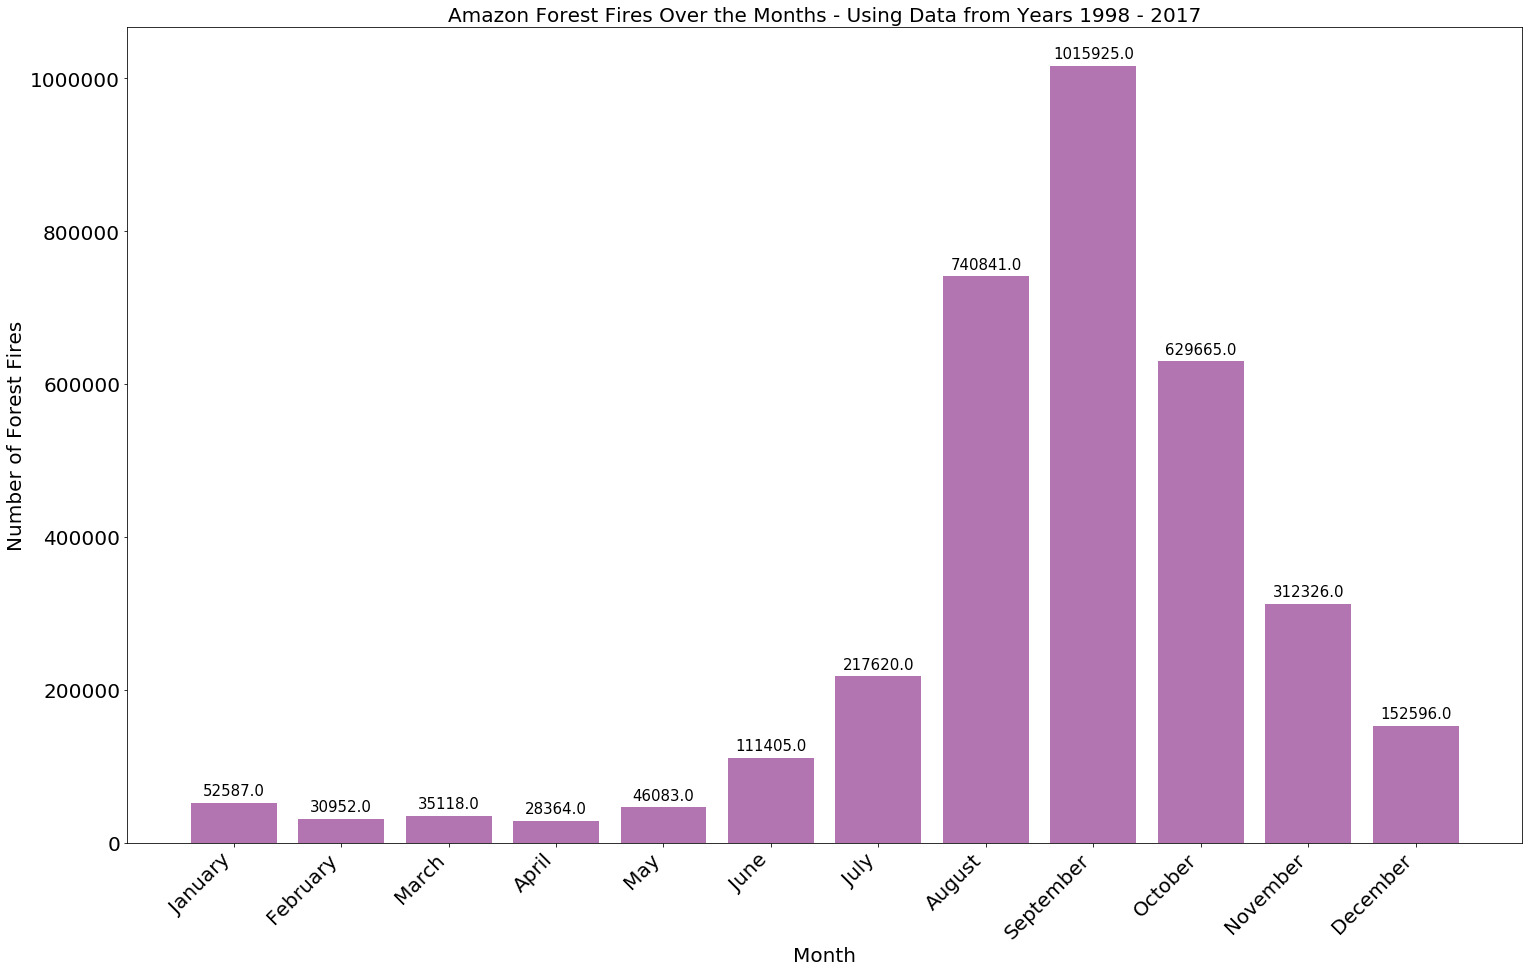

In [36]:
plt.figure(figsize=(25, 15)) #specify width and height 
#plt.bar(x-values, y-values) 
plt.bar(
forest_fire_per_month['month'],
forest_fire_per_month['number'], 
color = (0.5,0.1,0.5,0.6)) 
#use .suptitle for the actual title and .title for the subheading
plt.title('Amazon Forest Fires Over the Months - Using Data from Years 1998 - 2017', fontsize=20) 
plt.xlabel('Month', fontsize=20) 
plt.ylabel('Number of Forest Fires', fontsize=20)
#plt.text(x-coordinate, y-coordinate, valueOfText, alignmnet)
#this adds text at the top of each bar indicating its value
for i, num in enumerate(forest_fire_per_month['number']):
    plt.text(
        i,
        num + 10000,
        num,
        ha='center',
        fontsize=15)   
#plt.setp is to set a property on an artist object.
#plt.gca() gets the current axes (gca) instance on the current figure #matching the given keyword args.
#xticklabels and yticklabels are nothing but the values of the #lables on the x and y axis.
#The code below lets us set the fontsize and alignment of the x and #y axis tick labels
plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=20)
plt.setp(plt.gca().get_yticklabels(), fontsize=20)

SAVING TO CSV

In [65]:
data2.to_csv('amazon2.csv', index=False)
#modified file created 

FILTERING DATA

In [50]:
#months in which forest fires crossed 200000
newd=forest_fire_per_month.loc[(forest_fire_per_month['number']>200000)]

In [51]:
print(newd)

    index      month     number
6       6       July   217620.0
7       7     August   740841.0
8       8  September  1015925.0
9       9    October   629665.0
10     10   November   312326.0
